In [1]:
require 'mxnet'
require 'gnuplot'

true

In [2]:
data_ctx = MXNet.cpu
model_ctx = MXNet.cpu

num_inputs = 2
num_outputs = 1
num_examples = 1000

batch_size = 4
num_batches = num_examples/batch_size

learning_rate = 0.0001
epochs = 100

100

In [3]:
def real_fn(x)
  2.0 * x[0..-1, 0] - 3.4 * x[0..-1, 1] + 4.2
end

:real_fn

In [4]:
x = MXNet::NDArray.random_normal(shape: [num_examples, num_inputs], ctx: data_ctx)
noise = 0.2 * MXNet::NDArray.random_normal(shape: [num_examples], ctx: data_ctx)
y = real_fn(x) + noise


[4.84929, 4.63833, -3.39588, 10.7697, -3.81457, 8.60426, 3.36315, 3.65148, ...]
<MXNet::NDArray 1000 @cpu(0)>

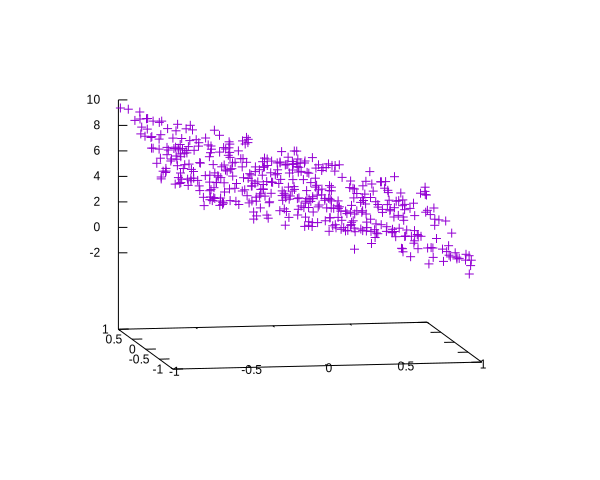

In [5]:
Gnuplot::SPlot.new do |plot|  
  plot.xrange '[-1.0:1.0]'
  plot.yrange '[-1.0:1.0]'
  plot.view '100,100'
  plot.data << Gnuplot::DataSet.new([x[0..-1, 0].to_a, x[0..-1, 1].to_a, y.to_a]) do |ds|
    ds.with = 'points'
    ds.notitle
  end
end

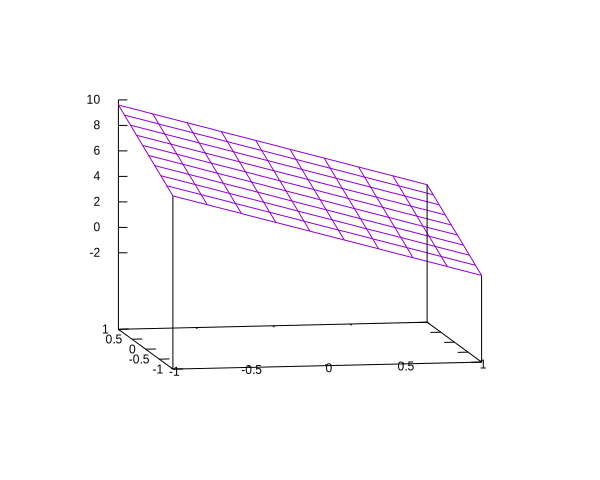

In [6]:
Gnuplot::SPlot.new do |plot|  
  plot.xrange '[-1.0:1.0]'
  plot.yrange '[-1.0:1.0]'
  plot.view '100,100'
  plot.set 'dummy', 'x0,x1'
  plot.data << Gnuplot::DataSet.new('2*x0 - 3.4*x1 + 4.2') do |ds|
    ds.with = 'lines'
    ds.notitle
  end
end

In [7]:
require './dataset'
train_data = Dataset.new(x, y, batch_size: batch_size, shuffle: true)

#<Dataset:0x00007fb2e6194178 @length=1000, @batch_size=4, @shuffle=true, @x=
[[1.16308, 0.483805], 
 [0.299563, 0.153025], 
 [-1.16881, 1.55807], 
 [-0.545945, -2.35563], 
 [0.54144, 2.67851], 
 [1.25463, -0.548774], 
 [-0.681064, -0.135316], 
 [0.377231, 0.410164], 
 [0.571268, -2.75796], 
 [1.07628, -0.614133], 
 [1.83076, -1.14681], 
 [0.053838, -2.50748], 
 [-0.59165, 0.858605], 
 [-0.227942, 0.201315], 
 [0.350055, 0.536052], 
 [1.51944, 1.90409], 
 [-1.57344, -0.140079], 
 [0.296701, 1.3112], 
 [0.50359, -1.18945], 
 [-0.550214, -1.59188], 
 ...
<MXNet::NDArray 1000x2 @cpu(0)>, @y=
[4.84929, 4.63833, -3.39588, 10.7697, -3.81457, 8.60426, 3.36315, 3.65148, ...]
<MXNet::NDArray 1000 @cpu(0)>>

In [9]:
@w = MXNet::NDArray.random_normal(shape: [num_inputs, num_outputs], ctx: model_ctx)
@b = MXNet::NDArray.random_normal(shape: [num_outputs], ctx: model_ctx)
params = [@w, @b]

params.each(&:attach_grad)

def net(x)
  MXNet::NDArray.dot(x, @w) + @b
end

def square_loss(ŷ, y)
  MXNet::NDArray.mean((ŷ - y) ** 2)
end

def sgd(params, learning_rate)
  params.each do |param|
    param[0..-1] = param - learning_rate * param.grad
  end
end

:sgd

In [10]:
epochs.times do |epoch|
  cumulative_loss = 0
  train_data.each do |data, label|
    data = data.as_in_context(model_ctx)
    label = label.as_in_context(model_ctx).reshape([-1, 1])
    loss = nil
    MXNet::Autograd.record do
      output = net(data)
      loss = square_loss(output, label)
    end
    loss.backward
    sgd(params, learning_rate)
    cumulative_loss += loss.as_scalar
  end
  puts cumulative_loss / num_batches
end

14.642351175308228
13.25630091190338
12.001658898830414
10.866167201519012
9.838553597688675
8.908537588596344
8.066902067422866
7.304979234218598
6.615466500610113
5.991509021103382
5.426794181585312
4.915490923166275
4.4528348065018655
4.034066595315934
3.6550846022367476
3.312076479792595
3.0015705469846727
2.720575758457184
2.4661896126866343
2.2359738382697105
2.0276039925813674
1.8389933143556119
1.6683066527843475
1.5138054828643799
1.3739573934674263
1.2473807663023473
1.1328233033418655
1.0290840384662152
0.9352178056538105
0.8502392206639051
0.773317217797041
0.7036948675513267
0.6406628623753786
0.5836074972450733
0.5319574915319681
0.4852178632803261
0.44290990639850497
0.40461039316654207
0.36993340111151335
0.3385507185906172
0.3101449355483055
0.28442831709980965
0.2611497810520232
0.24007368605583906
0.2209973866790533
0.20372424851357937
0.18809571966901423
0.17394660779088736
0.1611340243257582
0.1495337888430804
0.13903434044867755
0.129525998942554
0.120920022107660

100

In [11]:
@w


[[1.9923], 
 [-3.38783]]
<MXNet::NDArray 2x1 @cpu(0)>

In [12]:
@b


[4.18484]
<MXNet::NDArray 1 @cpu(0)>

In [13]:
IRuby.math('y = 2*x_0 - 3.4*x_1 + 4.2')

"$$y = 2*x_0 - 3.4*x_1 + 4.2$$"